# Loading packages and data

## Import needed Python Libraries

In [221]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
#Import Cancer data from the Sklearn library

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

## Let's view the data in a dataframe.

In [223]:
X = pd.DataFrame(data["data"], columns = data["feature_names"])
y = pd.DataFrame(data["target"], columns = ["target"])

In [224]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Let's Explore Our Dataset

In [225]:
print(X.shape)

(569, 30)


In [226]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [227]:
data.keys()   # name of all te columns in our data

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

## Visualize the relationship between our features

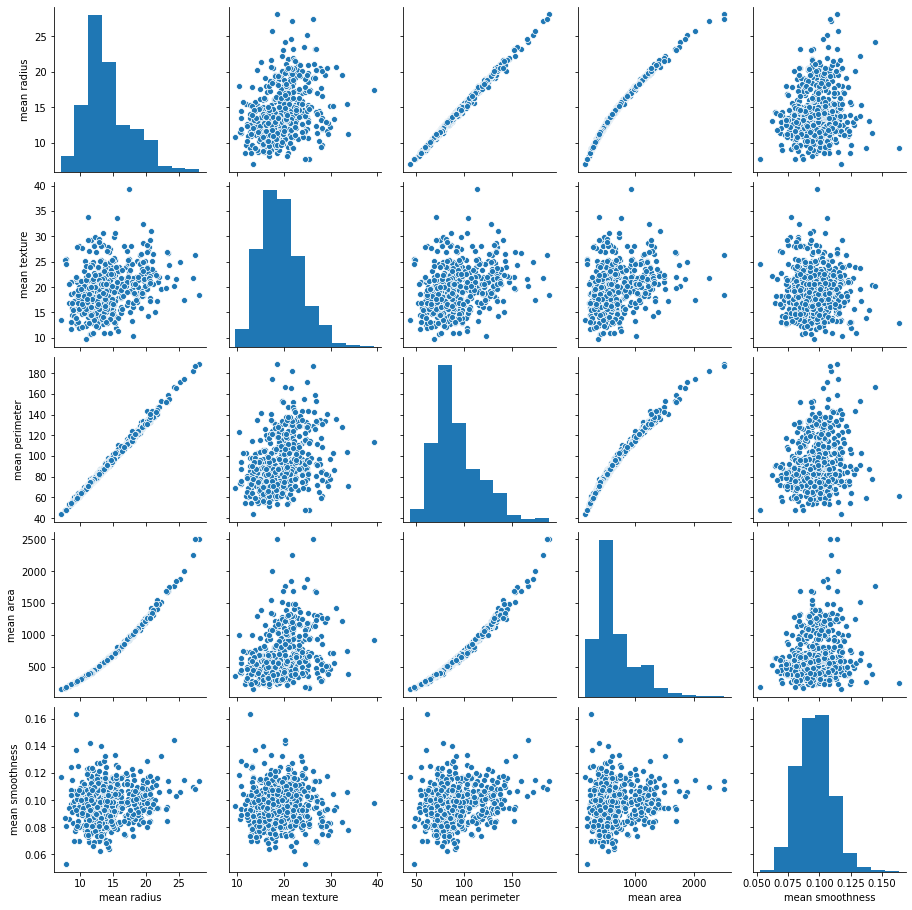

In [228]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(X, vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'] )

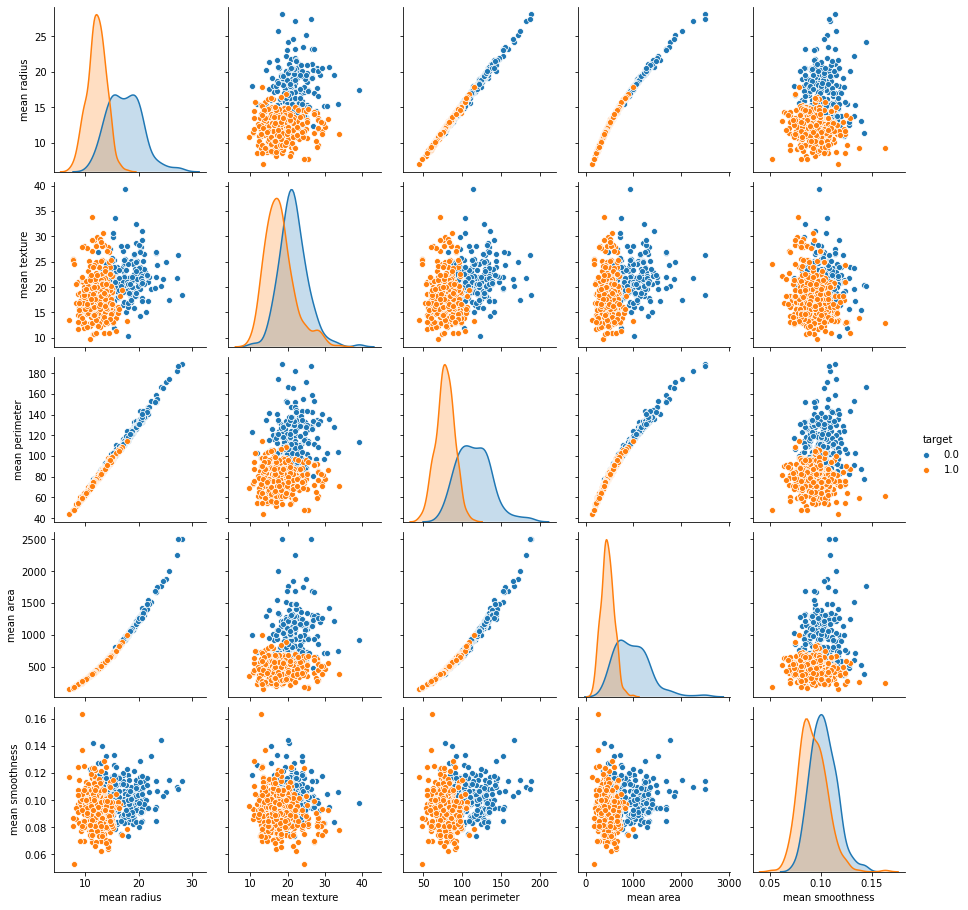

In [229]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] )

##  Let's visulaize our counts

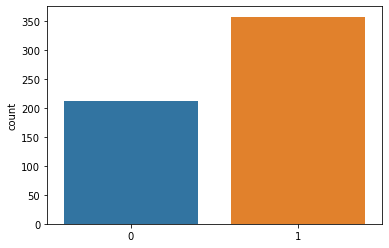

In [230]:
sns.countplot(data['target'], label = "Count") 

## sns.heatmap

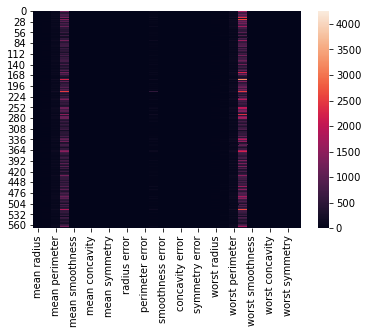

In [231]:
sns.heatmap(X)

## sns.heatmap from DataFrame.corr

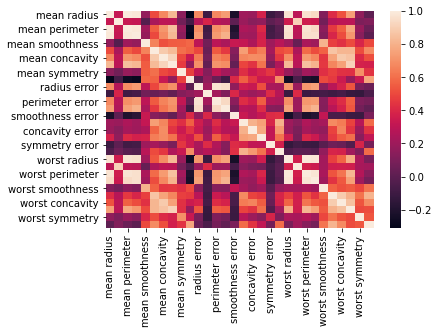

In [232]:
sns.heatmap(X.corr())

## Let's check the correlation between our features 

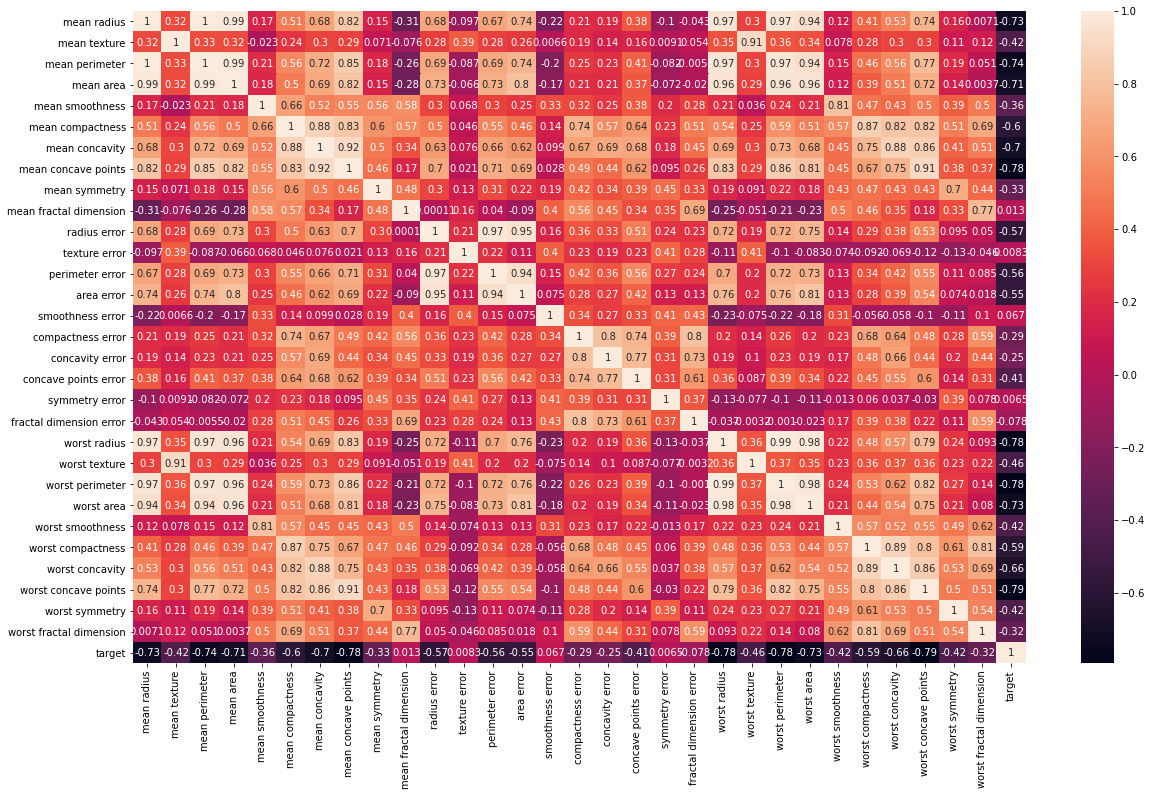

In [233]:
plt.figure(figsize=(20,12)) 
sns.heatmap(df_cancer.corr(), annot=True) 

## TRAIN AND TEST MODEL

## Create the training and testing data

In [234]:
from sklearn.model_selection import train_test_split

## Let’s split our data using 80% for training and the remaining 20% for testing

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

## Import Support Vector Machine (SVM) Model

In [236]:
from sklearn.svm import SVC

In [237]:
model = SVC()

## Now, let’s train our SVM model with our “training” dataset.

In [238]:
model.fit(X_train,y_train)

e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

## Let’s use our trained model to make a prediction using our testing data

In [239]:
y_predict = model.predict(X_test)

In [240]:
actual = y_test

## Next step is to check the accuracy of our prediction by comparing it to the output we already have (y_test). We are going to use confusion matrix for this comparison

## Let’s create a confusion matrix for our classifier’s performance on the test dataset. 

## import metric libraries

In [241]:
from sklearn.metrics import classification_report, confusion_matrix

In [242]:
report = classification_report(actual, y_predict)

In [243]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        48
           1       0.89      1.00      0.94        66

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



In [244]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,8,40


## Let’s visualize our confusion matrix on a Heatmap

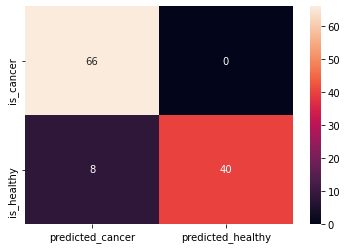

In [245]:
sns.heatmap(confusion, annot=True)

## Normalize our model, and then train again

## Improving our Model

## The first process we will try is by normalizing our data
## Data normalization is a feature scaling process that brings all values into range [0,1]
### X’ = (X-X_min) / (X_max — X_min)

## Normalize Training Data

In [246]:
X_train_min = X_train.min()
X_train_min

mean radius                  6.981000
mean texture                10.380000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.490000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [247]:
X_test_min = X_test.min()
X_test_min

mean radius                  8.196000
mean texture                 9.710000
mean perimeter              51.710000
mean area                  201.900000
mean smoothness              0.072740
mean compactness             0.034540
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.133900
mean fractal dimension       0.050250
radius error                 0.134400
texture error                0.406400
perimeter error              0.981200
area error                   8.205000
smoothness error             0.002826
compactness error            0.003746
concavity error              0.000000
concave points error         0.000000
symmetry error               0.010130
fractal dimension error      0.001345
worst radius                 8.964000
worst texture               12.020000
worst perimeter             57.260000
worst area                 242.200000
worst smoothness             0.084090
worst compactness            0.047120
worst concav

In [248]:
X_train_max = X_train.max()
X_train_max

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.14470
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09296
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [249]:
X_test_max = X_test.max()
X_test_max

mean radius                  25.73000
mean texture                 28.23000
mean perimeter              174.20000
mean area                  2010.00000
mean smoothness               0.16340
mean compactness              0.28390
mean concavity                0.33680
mean concave points           0.19130
mean symmetry                 0.25970
mean fractal dimension        0.09744
radius error                  1.20700
texture error                 2.92700
perimeter error               7.73300
area error                  224.10000
smoothness error              0.02177
compactness error             0.10640
concavity error               0.10270
concave points error          0.02771
symmetry error                0.05963
fractal dimension error       0.02286
worst radius                 33.13000
worst texture                40.54000
worst perimeter             229.30000
worst area                 3234.00000
worst smoothness              0.20980
worst compactness             0.86630
worst concav

In [250]:
X_train_range = (X_train_max - X_train_min)
X_train_range

mean radius                  21.129000
mean texture                 28.900000
mean perimeter              144.710000
mean area                  2357.500000
mean smoothness               0.092070
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.043000
radius error                  2.761500
texture error                 4.524800
perimeter error              21.223000
area error                  535.398000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.071068
fractal dimension error       0.028945
worst radius                 28.110000
worst texture                37.050000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.151430
worst compactness        

In [251]:
X_test_range = (X_test_max - X_test_min)
X_test_range

mean radius                  17.534000
mean texture                 18.520000
mean perimeter              122.490000
mean area                  1808.100000
mean smoothness               0.090660
mean compactness              0.249360
mean concavity                0.336800
mean concave points           0.191300
mean symmetry                 0.125800
mean fractal dimension        0.047190
radius error                  1.072600
texture error                 2.520600
perimeter error               6.751800
area error                  215.895000
smoothness error              0.018944
compactness error             0.102654
concavity error               0.102700
concave points error          0.027710
symmetry error                0.049500
fractal dimension error       0.021515
worst radius                 24.166000
worst texture                28.520000
worst perimeter             172.040000
worst area                 2991.800000
worst smoothness              0.125710
worst compactness        

## Normalize with sklearn

In [252]:
classifier = SVC()
classifier.fit(X_train, y_train)

e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [253]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1])

In [254]:
report = classification_report(y_test, model_with_normalized.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        48
           1       0.00      0.00      0.00        66

    accuracy                           0.42       114
   macro avg       0.21      0.50      0.30       114
weighted avg       0.18      0.42      0.25       114



e:\python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [255]:
cm = confusion_matrix(y_test, y_predict)

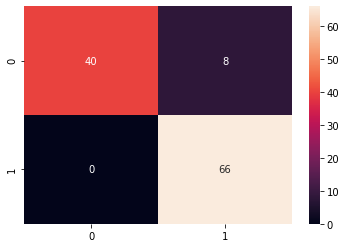

In [256]:
sns.heatmap(cm, annot= True)

## Normalizing X_train

In [257]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
412,0.114345,0.391003,0.110290,0.053150,0.293907,0.126219,0.087512,0.025487,0.108081,0.401860,...,0.072394,0.418354,0.080681,0.028460,0.247177,0.156601,0.149201,0.088110,0.192682,0.242818
461,0.967343,0.549827,0.988943,1.000000,0.605735,0.550334,0.851687,0.839463,0.505556,0.145814,...,1.000000,0.509582,1.000000,1.000000,0.426137,0.386442,0.545767,0.902062,0.255643,0.126131
532,0.317052,0.205882,0.303849,0.183245,0.435973,0.163088,0.041050,0.093439,0.288384,0.269535,...,0.281750,0.208097,0.254943,0.144564,0.364723,0.125263,0.096326,0.299107,0.294844,0.149416
495,0.373373,0.340138,0.361620,0.227953,0.469643,0.196522,0.159888,0.246074,0.215657,0.174884,...,0.287442,0.431579,0.266398,0.147070,0.333025,0.108188,0.135783,0.349485,0.191019,0.071822
13,0.419755,0.469550,0.414000,0.271135,0.340828,0.247899,0.232849,0.266600,0.397475,0.079535,...,0.316969,0.409447,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536,0.295557,0.051358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.606702,0.386851,0.593670,0.460870,0.447486,0.341145,0.298032,0.431958,0.522222,0.136047,...,0.633227,0.435897,0.597091,0.448240,0.423496,0.287384,0.288898,0.625430,0.357567,0.180441
223,0.415022,0.341522,0.406399,0.262057,0.541653,0.309858,0.268744,0.321173,0.441919,0.303953,...,0.413732,0.480432,0.375965,0.221884,0.554910,0.408175,0.317572,0.508247,0.576859,0.336875
271,0.203938,0.092042,0.196531,0.103712,0.496470,0.173916,0.076500,0.136928,0.358081,0.296279,...,0.156172,0.099595,0.138752,0.066924,0.426798,0.119733,0.101837,0.300687,0.277501,0.165158
474,0.184533,0.181315,0.183954,0.091368,0.522103,0.268450,0.119845,0.078082,0.404545,0.428140,...,0.142654,0.185155,0.151253,0.060927,0.409628,0.351709,0.268770,0.273746,0.241388,0.347370


## Normalize X_test

In [258]:
X_test_scaled = (X_test - X_test_min)/(X_test_range)
X_test_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
269,0.143379,0.576674,0.145236,0.079089,0.391132,0.378409,0.250831,0.149869,0.261526,0.389277,...,0.112803,0.462482,0.111893,0.056220,0.393047,0.253766,0.344997,0.296245,0.181283,0.243578
263,0.422836,0.522138,0.394236,0.307892,0.062431,0.086702,0.124970,0.148824,0.165342,0.088578,...,0.370190,0.688990,0.340851,0.249482,0.193382,0.163066,0.307692,0.295143,0.197117,0.078906
30,0.595072,0.831533,0.596702,0.490072,0.371277,0.618223,0.688539,0.650288,0.670906,0.248358,...,0.587023,0.771038,0.600093,0.477238,0.517143,0.462145,0.834990,0.636583,0.351604,0.338670
452,0.216950,1.000000,0.204588,0.133068,0.128281,0.120148,0.120398,0.101673,0.219396,0.228650,...,0.170736,0.906732,0.161648,0.094091,0.292021,0.169047,0.246562,0.245126,0.149208,0.198980
214,0.341850,0.761339,0.336027,0.226094,0.241452,0.385226,0.331057,0.337794,0.712242,0.298368,...,0.326740,0.800491,0.335620,0.190220,0.571235,0.437975,0.509735,0.610403,0.611449,0.380718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.452492,0.592333,0.460364,0.330126,0.488198,0.672361,0.511283,0.537376,0.655803,0.493961,...,0.496400,0.682328,0.462334,0.358580,0.754196,0.459215,0.651327,0.714089,0.404791,0.482759
504,0.061138,0.170626,0.079843,0.025884,1.000000,0.759384,0.288895,0.274543,0.825914,0.948718,...,0.054457,0.152875,0.068531,0.019386,0.844086,0.362533,0.285773,0.353083,0.269184,0.579521
346,0.220372,0.496220,0.203690,0.134616,0.122656,0.093840,0.022298,0.044370,0.171701,0.216783,...,0.193495,0.527349,0.170193,0.107093,0.356455,0.107522,0.061348,0.175439,0.237109,0.189215
14,0.315615,0.696544,0.341987,0.208174,0.445180,0.781039,0.631829,0.419498,0.580286,0.563043,...,0.251014,0.700912,0.299581,0.152249,0.644420,0.885495,0.945269,0.760592,0.382460,0.736981


## Normalize Training Data

In [259]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/ X_test_range

## Now, let’s train our SVM model with our scaled (Normalized) datasets.

In [260]:
model = SVC()
model.fit(X_train_scaled, y_train)

e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

## Prediction with Scaled dataset

In [261]:
y_predict = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

## Confusion Matrix on Scaled dataset

In [262]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,61,5
is_healthy,0,48


In [263]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        48
           1       1.00      0.92      0.96        66

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



## Gridsearch Model

In [264]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [265]:
from sklearn.model_selection import GridSearchCV

In [266]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [267]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.956, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.923, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.923, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.901, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elap

[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.934, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.846, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.901, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.934, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.637, total=   0.0s
[CV] C

e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation

[CV] ............ C=1, gamma=1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.923, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.978, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.956, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.945, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation

[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.956, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.978, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.945, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.978, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.978, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.989, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.912, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.934, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.923, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.945, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.989, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.978, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
e:\python\lib\site-packages\sklearn\utils\validation

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [268]:
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


SVC(C=10, gamma=0.1)


In [269]:
grid_predictions = grid.predict(X_test_scaled)

In [270]:
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,63,3
is_healthy,0,48


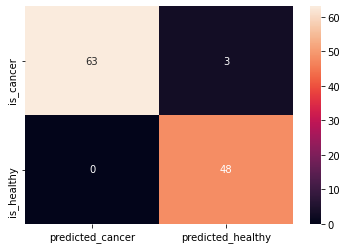

In [271]:
sns.heatmap(confusion, annot=True)

In [272]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       1.00      0.95      0.98        66

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

